In [1]:
import numpy as np
from scipy import constants

print('c = ', constants.c)
print('h = ', constants.h)
print('k = ', constants.k)
print('sigma = ', constants.sigma)


def BBR_spectrum_f(f, T):
    bbr = 2.0*constants.h*f**3/constants.c**2/(np.exp(constants.h*f/(constants.k*T)) - 1)
    return bbr

def BBR_spectrum_lamda(lamda, T):
    bbr = 2.0*constants.h*constants.c**2/lamda**5/(np.exp(constants.h*constants.c/(lamda*constants.k*T)) - 1)
    return bbr



c =  299792458.0
h =  6.62607004e-34
k =  1.38064852e-23
sigma =  5.670367e-08


Populating the interactive namespace from numpy and matplotlib


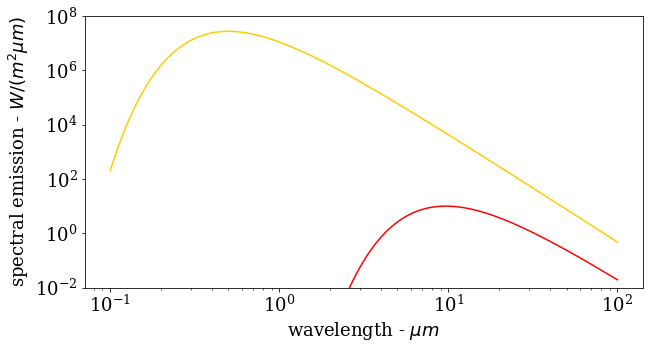

In [2]:
%pylab inline
import matplotlib

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

figsize(10, 5)

N = 10000
L0, L1 = 100.0*constants.nano, 100.0*constants.micro
dL = (L1-L0)/N
lamda = np.linspace(L0, L1, N)

T_sun = 5800
T_env = 300

bbr_sun = BBR_spectrum_lamda(lamda, T_sun)
bbr_env = BBR_spectrum_lamda(lamda, T_env)

plot(lamda*1.0e6, bbr_sun*1.0e-6, color=(1.0, 204.0/255, 0.0))
plot(lamda*1.0e6, bbr_env*1.0e-6, 'r')

ylim([1.0e-2, 1.0e8])
xscale('log')
yscale('log')

xlabel(r'wavelength - $\mu m$ ', fontsize=18)
ylabel(r'spectral emission - $W/(m^2 \mu m)$', fontsize=18)

show()



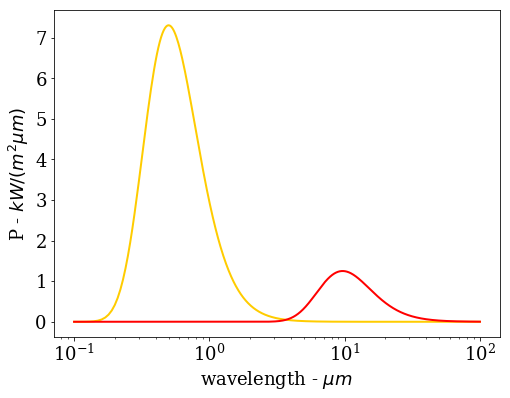

1387.58684751
457.091535605


In [7]:
figsize(8, 6)

r_s = 695700*1.0e3
r_es = 149.6*1.0e9
r_e = 6371*1.0e3


A_s = 4.0*np.pi*r_s**2 ##sun's surface area
A_e = 4.0*np.pi*r_e**2 ##earth's surface area
A_env = 1.0


P_sun_rec = bbr_sun*A_s*(4*np.pi)/(4*np.pi*r_es**2)
P_env_rad = bbr_env*A_env*(4.0*np.pi)


plot(lamda*1.0e6, P_sun_rec/1e3*1.0e-6, color=(1.0, 204.0/255, 0.0), lw=2)
plot(lamda*1.0e6, P_env_rad/1e3*1.0e-6*1.0e1, 'r', lw=2)

xscale('log')

xlabel(r'wavelength - $\mu m$ ', fontsize=18)
ylabel(r'P - $kW/(m^2 \mu m)$', fontsize=18)

savefig('other/1.png', bbox_inches='tight', pad_inches=0.5)
show()


print(np.sum(P_sun_rec)*dL/4)
print(np.sum(P_env_rad)*dL/4)



In [1]:
import numpy as np

r_s = 695700*10**3
r_es = 149.6*10**9
r_e = 6371*10**3


A_s = 4.0*np.pi*r_s**2 ##sun's surface area
A_e = 4.0*np.pi*r_e**2 ##earth's surface area

T_s = 5800 ##K sun's temparature

sigma = 5.67*10**-8

P_sun = sigma*A_s*T_s**4

print('P_sun = ', P_sun)


P_sun_on_earth = P_sun/(4.0*np.pi*r_es**2)

print('P_sun_on_earth : ', P_sun_on_earth)

T_o = 300
A_o = 1

P_o = sigma*A_o*T_o**4

print('P_o : ', P_o)



P_sun =  3.9025538448409824e+26
P_sun_on_earth :  1387.636940684794
P_o :  459.27
